# A Sentiment Analysis on Brands and Product Emotions

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> **Introduction:** Company Goku is going to launch a new mobile phone soon. They are worried about how people will react to it, and they want to keep an eye on its popularity. 


> **Problem Statement:** The problem at hand is to build an NLP model that can analyze Twitter sentiments about Apple and Google products, which have the largest market dominance in the industry. The dataset comprises over 9,000 Tweets that have been rated as positive, negative, or neutral(Is_therea_an_emotion directed at the brand). This project aims to address the challenge faced by tech companies in understanding customer sentiments towards their products and gain valuable insights from customer feedback. This will improve customer satisfaction and enable Company Goku to stay ahead of the competition in the highly competitive tech industry.


> **Main Objective:** Create a Sentiment Analysis model that can accurately predict whether tweets about the phone are positive, negative, or neutral.

### b) Defining the Metric for Success 

The model will be considered a success if the model has an accuracy and recall of at least 60%. 

### c) Recording the Experimental Design 

1.Data Collection

2.Reading the Data 

3.Checking the Data 

4.Data Cleaning

5.Exploratory Data Analysis

6.Data Modeling

7.Conclusion

8.Challenging the solution

9.Recommendations 

10.Future Improvement Ideas

11.Deployment of the model


### d) Data Understanding 

| Feature | Contents|
|:--- |:--- |
|Text_data|This column contains tweets in terms of text data about the different brands and products.|
|Emotion_in_tweet_is directed_at|This column contains data on the different services and products of different brands that the text is associated with. It contains a meaningful relationship between the brand and potential customers which describes basic emotions.|
|Is_therea_an_emotion directed at the brand|Contains the classification based on the *Emotion_in_tweet_is directed_at* column, for example positive, negative, and neutral.|

## 2. Reading the Data

In [95]:
# Loading the required libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from textblob import TextBlob

import re
import string
import nltk

from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import RegexpTokenizer


from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

import scipy.sparse as sp

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

from collections import Counter

from imblearn.over_sampling import SMOTE


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mitchellchege/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mitchellchege/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mitchellchege/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [96]:
# Loading the data 

tweet_df = pd.read_csv("judge-1377884607_tweet_product_company.csv",encoding='ISO-8859-1')
tweet_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [97]:
# Checking the shape of tweet_df

print(tweet_df.shape)

(9093, 3)




## 3. Checking the Data

An understanding of the data is critical for optimum results. The size of the dataset as well as the type of data is important when perfoming analysis and coming up with the best models for the data

In [98]:
# Previewing the top of our dataset

tweet_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [99]:
# Previewing the bottom of our dataset

tweet_df.tail()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,NaN,No emotion toward brand or product


In [100]:
# Checking whether each column has an appropriate datatype

tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


It can be noted that some columns in tweet_df contain null values. This will be tidied under data cleaning before any analysis is done. 

In [101]:
# Check for the percentage of missing data

tweet_df.isna().sum()*100/len(tweet_df)

tweet_text                                             0.010997
emotion_in_tweet_is_directed_at                       63.807324
is_there_an_emotion_directed_at_a_brand_or_product     0.000000
dtype: float64

The column *product* has 5802 missing values which is **63.8%** of the data. This is a significant amount of the data and even though the column may be useful, the objective is to  predict the sentiment (positive, negative, or neutral) expressed in the tweets related to a particular topic or brand and so the column will be dropped later.

In [102]:
# Checking for emotion_in_tweet_is_directed_at value counts

value_counts1 = tweet_df['emotion_in_tweet_is_directed_at'].value_counts()
value_counts1

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [103]:
# Checking for is_there_an_emotion_directed_at_a_brand_or_prouct value counts

value_counts2 = tweet_df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()
value_counts2

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

The dataset is now ready for cleaning and further analysis.

## 4. Cleaning the Dataset

### 4.1 Renaming columns 

The dataframe contains very long column names that can be made more easier to deal with by renaming them.

In [104]:
# Renaming the columns 

tweet_df.rename(columns = {'tweet_text': 'Tweet','emotion_in_tweet_is_directed_at':'Product',
                           'is_there_an_emotion_directed_at_a_brand_or_product':'Emotion'},
                inplace = True)
tweet_df.tail()

,Tweet,Product,Emotion
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,NaN,No emotion toward brand or product


### 4.2 Deleting rows with no tweet data

In [105]:
# Deleting rows with no tweet data

df_clean = tweet_df.dropna(subset=['Tweet'])

In [106]:
# Confirming that the row was deleted

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9092 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    9092 non-null   object
 1   Product  3291 non-null   object
 2   Emotion  9092 non-null   object
dtypes: object(3)
memory usage: 284.1+ KB


It was noted that the column Tweet had missing information. Seeing as this was only one row in a dataset containing 9000+ rows and there is no way to find out the contents of the tweet, it was dropped.

### 4.3 Deleting tweet not in English 

In [107]:
df_clean = df_clean.drop(9092, axis = 0)
df_clean.head()

,Tweet,Product,Emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


### 4.4 Deleting rows with "I can't tell"

In [108]:
# Deleting rows with "I can't tell"
df_clean = df_clean[df_clean.Emotion != "I can't tell"]
df_clean['Emotion'].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product'], dtype=object)

Since no information can be gained from the narration **"I can't tell"** ,the 156 rows were dropped.

### 4.5 Filling missing values

In [109]:
# Checking for unique itemns under product

df_clean['Product'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', nan, 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [110]:
# Creating a function for filling nan values in the column product

def categorize_devices(df, col_name, keywords=['iphone', 'apple', 'ipad', 'android', 'google']):
    # Convert column to lowercase string
    df[col_name] = df[col_name].astype(str).str.lower()
    
    # Initialize category column with 'Unknown'
    df['category'] = 'Unknown'
    
    # Categorize each row based on keywords
    for i, row in df.iterrows():
        text = row[col_name]
        if any(keyword in text for keyword in ['iphone', 'apple', 'ipad']):
            df.loc[i, 'category'] = 'Apple'
        elif 'android' in text:
            df.loc[i, 'category'] = 'Android'
        elif 'google' in text:
            df.loc[i, 'category'] = 'Google'
    
    return df


In [111]:
# Creating a subset of df_clean where product is nan

df_missing = df_clean[df_clean['Product'].isna() == True]
categorize_devices(df_missing,"Tweet").head()

,Tweet,Product,Emotion,category
5,@teachntech00 new ipad apps for #speechtherapy...,NaN,No emotion toward brand or product,Apple
16,holler gram for ipad on the itunes app store -...,NaN,No emotion toward brand or product,Apple
32,"attn: all #sxsw frineds, @mention register fo...",NaN,No emotion toward brand or product,Android
33,anyone at #sxsw want to sell their old ipad?,NaN,No emotion toward brand or product,Apple
34,anyone at #sxsw who bought the new ipad want ...,NaN,No emotion toward brand or product,Apple


In [112]:
# Updating df_clean product with values extrapolated from df_missing

df_clean['Product_updated'] = df_clean['Product'].fillna(df_missing['category'])
df_clean['Product_updated'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', 'Apple',
       'Android', 'Android App', 'Other Google product or service',
       'Unknown', 'Other Apple product or service'], dtype=object)

In [113]:
# Dropping df_clean Product

df_clean = df_clean.drop(columns = ['Product'], axis = 1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8935 entries, 0 to 9091
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tweet            8935 non-null   object
 1   Emotion          8935 non-null   object
 2   Product_updated  8935 non-null   object
dtypes: object(3)
memory usage: 279.2+ KB


There were about 5,802 missing values for the column Product, the Tweet column was analysed and any mention of words like "Google", "ipad","Apple" etc. were then used to replace the missing values. While dropping the missing values was an option the missing data was too large to take this approach for now. 

### 4.6 Data anonymization of handles

In [114]:
# Data anonymization of handles

df_clean.Tweet = df_clean.Tweet.apply(lambda x: re.sub("@[A-Za-z0-9]+", "", x))
df_clean.Tweet

0       . I have a 3G iPhone. After 3 hrs tweeting at ...
1        Know about  ? Awesome iPad/iPhone app that yo...
2        Can not wait for #iPad 2 also. They should sa...
3        I hope this year's festival isn't as crashy a...
4        great stuff on Fri #SXSW: Marissa Mayer (Goog...
                              ...                        
9087     Yup, but I don't have a third app yet. I'm on...
9088                        Ipad everywhere. #SXSW {link}
9089    Wave, buzz... RT  We interrupt your regularly ...
9090    Google's Zeiger, a physician never reported po...
9091    Some Verizon iPhone customers complained their...
Name: Tweet, Length: 8935, dtype: object

The handles of the specific users were dropped to protect their identities and maintain data privacy.

### 4.7 Checking for duplicates

In [115]:
# Checking for duplicates

df_clean.duplicated().any()

True

In [116]:
# Identifying duplicates in df_clean

duplicated_values = df_clean[df_clean.duplicated(keep = False)]
duplicated_values.shape

(55, 3)

In [117]:
# Drop duplicated rows 

df_clean.drop_duplicates(inplace = True)
df_clean.shape

(8905, 3)

All duplicates were dropped to enhance accuracy when building the model. 

## 5. Exploratory Data Analysis

### 5.1 Identifying the most common words

Word clouds were generated to visualize the most common words in the dataset. This identified words or phrases that are strongly associated with each sentiment class.

In [118]:
# Specifying the emotion to be plotted

condition = df_clean['Emotion'] == 'Negative emotion'
neg_result = df_clean.loc[condition]

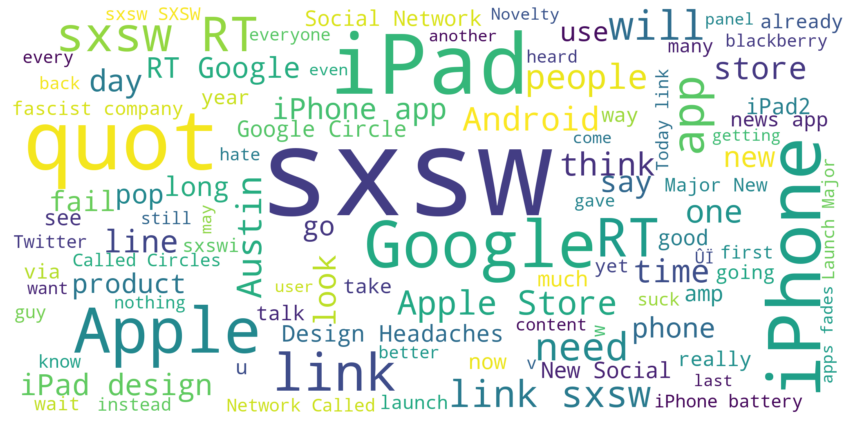

In [119]:
# Generate a string of all the tweet texts

all_text = ' '.join(neg_result['Tweet'])

# Create the word cloud
wordcloud = WordCloud(background_color="white", 
                      max_words=100,
                      max_font_size=300,
                      width=2048, 
                      height=1000).generate(all_text)

# Display the word cloud
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [120]:
# Specifying the emotion to be plotted

condition = df_clean['Emotion'] == 'Positive emotion'
pos_result = df_clean.loc[condition]

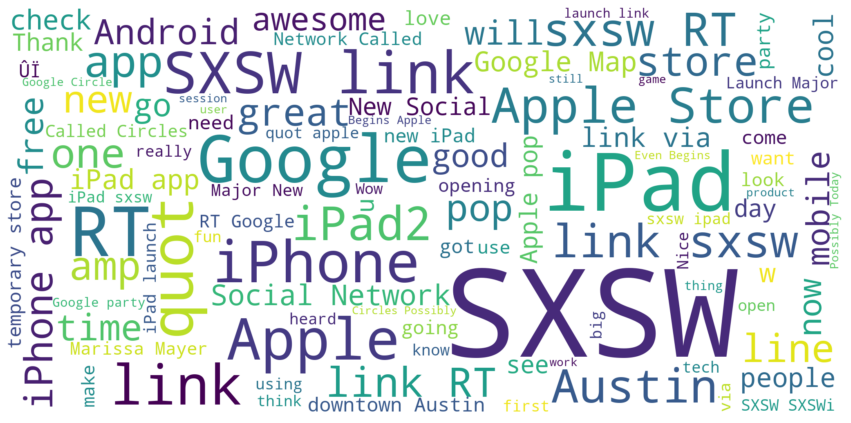

In [121]:
# Generate a string of all the tweet texts

all_text = ' '.join(pos_result['Tweet'])

# Create the word cloud
wordcloud = WordCloud(background_color="white", 
                      max_words=100,
                      max_font_size=300,
                      width=2048, 
                      height=1000).generate(all_text)

# Display the word cloud
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [122]:
# Specifying the emotion to be plotted

condition = df_clean['Emotion'] == 'No emotion toward brand or product'
neutral_result = df_clean.loc[condition]

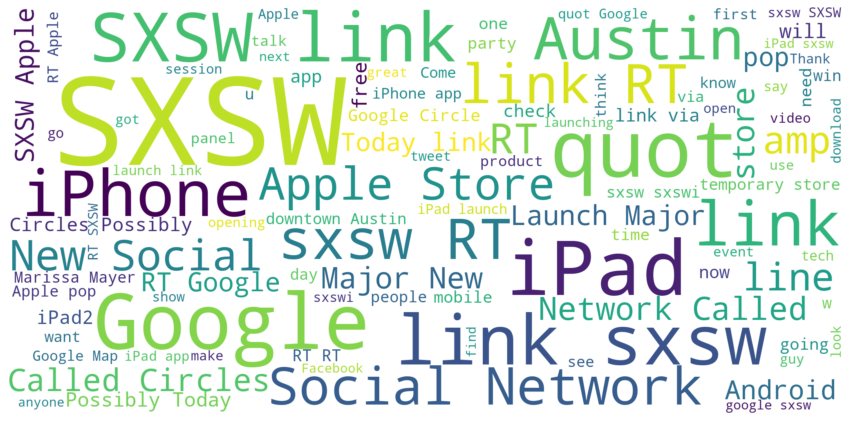

In [123]:
# Generate a string of all the tweet texts

all_text = ' '.join(neutral_result['Tweet'])

# Create the word cloud
wordcloud = WordCloud(background_color="white", 
                      max_words=100,
                      max_font_size=300,
                      width=2048, 
                      height=1000).generate(all_text)

# Display the word cloud
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

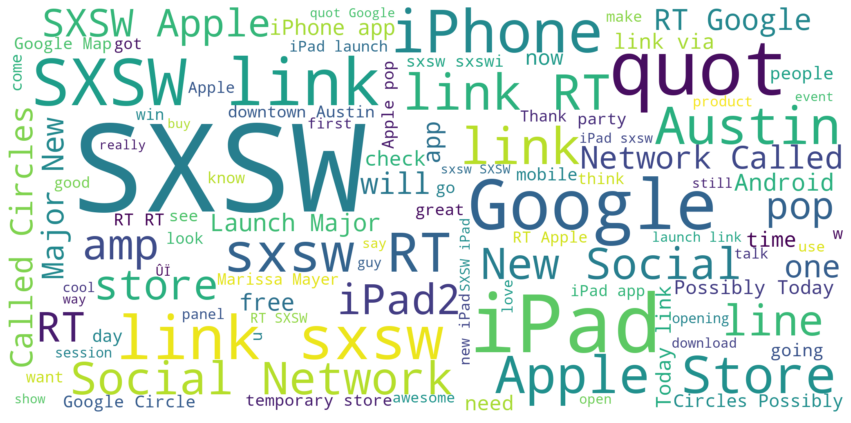

In [124]:
# Generate a string of all the tweet texts

all_text = ' '.join(df_clean['Tweet'])

# Create the word cloud
wordcloud = WordCloud(background_color="white", 
                      max_words=100,
                      max_font_size=300,
                      width=2048, 
                      height=1000).generate(all_text)

# Display the word cloud
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

### 5.2 Checking the distribution of classes?

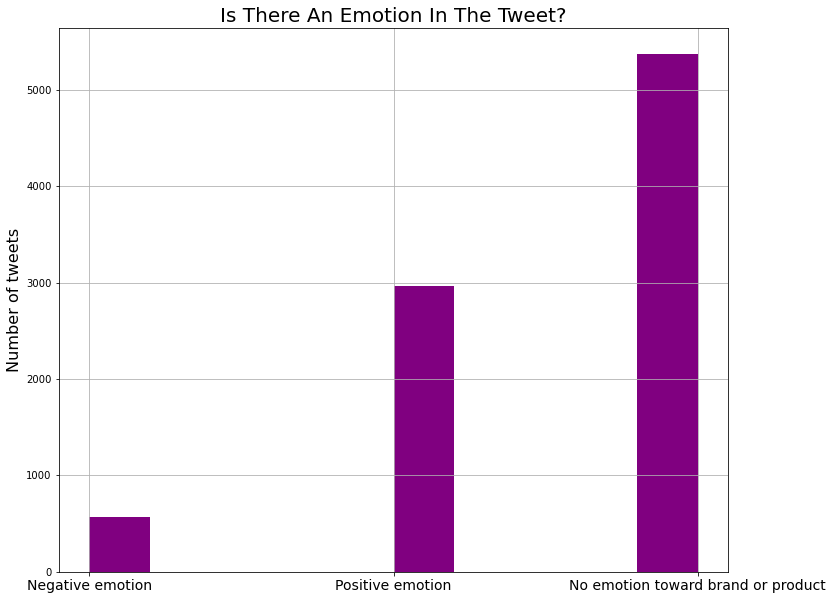

In [125]:
# Checking the frequency of emotions

plt.figure(figsize=(12,10))
df_clean.Emotion.hist(xlabelsize=14, color='purple')
plt.title('Is There An Emotion In The Tweet?', fontsize=20)
plt.ylabel('Number of tweets', fontsize=16)
plt.show()


From the plot above, it is noted that the labels are highly imbalanced whether the data is taken as a binary classification problem with Positive vs. Negative emotions or taken as a multiclass classification problem with all three labels. This will be dealt with in the pre-processing stage.

### 5.3 What is the distribution of the products?

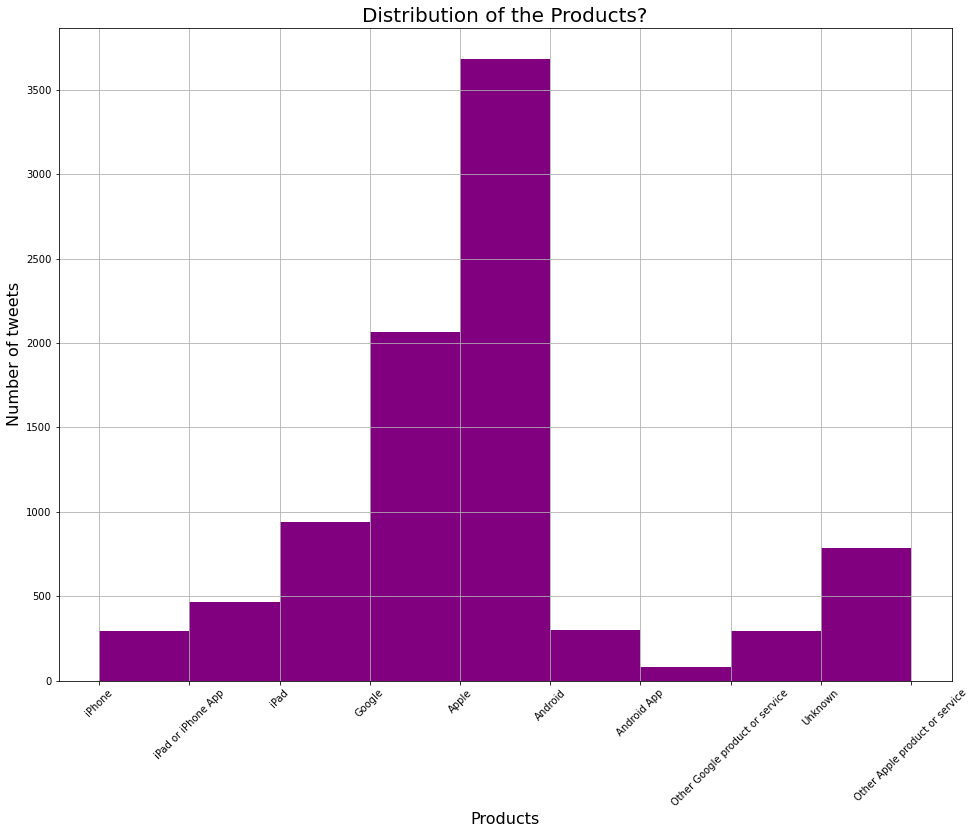

In [126]:
# Checking the distribution of the products

plt.figure(figsize=(16,12))
df_clean.Product_updated.hist(bins=9, color='purple')
plt.xticks(rotation=45)
plt.title('Distribution of the Products?', fontsize=20)
plt.xlabel('Products', fontsize=16)
plt.ylabel('Number of tweets', fontsize=16)
plt.show()


Sentiment                        Negative  Neutral  Positive
Product_updated                                             
Android                                32      149       119
Android App                             8       23        47
Apple                                 395     1901      1378
Google                                200     1267       596
Other Apple product or service          2        8        25
Other Google product or service        29      126       135
Unknown                               109      335       309
iPad                                  114      375       450
iPad or iPhone App                     44      133       290
iPhone                                 34      127       132


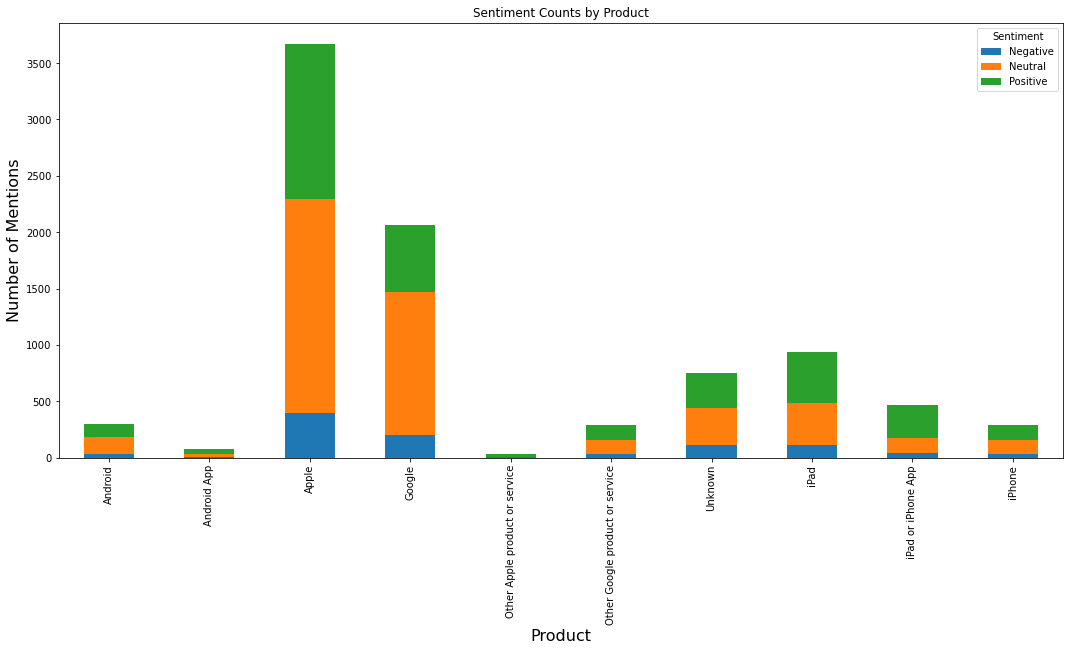

In [129]:
# Remove rows with missing sentiment values
df_clean.dropna(subset=["Tweet"], inplace=True)

# Compute the sentiment polarity of each tweet
df_clean["Polarity"] = df_clean["Tweet"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Assign each tweet to a sentiment category
df_clean["Sentiment"] = pd.cut(df_clean["Polarity"],
                               bins=[-1, -0.1, 0.1, 1],
                               labels=["Negative", "Neutral", "Positive"])

# Count the number of occurrences of each sentiment by product
sentiment_counts = pd.crosstab(df_clean["Product_updated"], df_clean["Sentiment"])
print(sentiment_counts)

# Create a stacked bar chart of sentiment counts for each product
sentiment_counts.plot(figsize=(18,8), kind="bar", stacked=True)

# Set the title and axis labels
plt.title("Sentiment Counts by Product")
plt.xlabel("Product",fontsize=16)
plt.ylabel("Number of Mentions",fontsize=16)
plt.show()


From the plot above, it was noted that Apple had the highest mention for all three emotions, then closey followed by Goggle.

## 6. Data Modeling

### 6.1 Pre Processing

#### a. Dropping unecessary columns for modelling

In [34]:
#  Dropping unecessary columns for modelling

df_clean.drop(columns = ['Product_updated','Polarity',
                         'Sentiment'],inplace = True)
df_clean.head()

,Tweet,Emotion
0,. I have a 3G iPhone. After 3 hrs tweeting at ...,Negative emotion
1,Know about ? Awesome iPad/iPhone app that yo...,Positive emotion
2,Can not wait for #iPad 2 also. They should sa...,Positive emotion
3,I hope this year's festival isn't as crashy a...,Negative emotion
4,great stuff on Fri #SXSW: Marissa Mayer (Goog...,Positive emotion


#### b. Creating a corpus

In [35]:
# Creating a corpus from the Tweet column
corpus_tweet = df_clean['Tweet'].to_list()
corpus_tweet = ",".join(corpus_tweet)
corpus_tweet[:100]

'. I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin '

#### c. Tokenizing the feature (X)

Tokenization is the process of breaking up a text into smaller units, such as words or subwords. Tokenization is an important step in NLP because it helps to represent the text in a structured format that can be easily analyzed by machine learning algorithms.

In [36]:
# Tokenizing the corpus 
token_tweet = word_tokenize(corpus_tweet)
token_tweet[:15]

['.',
 'I',
 'have',
 'a',
 '3G',
 'iPhone',
 '.',
 'After',
 '3',
 'hrs',
 'tweeting',
 'at',
 '#',
 'RISE_Austin',
 ',']

#### d. Removing stop words

Removing stopwords is important in NLP because these words are common in a language but often do not carry much meaning. By removing them, dimensionality of the data is reduced and focus is on the more meaningful words in a text. This can lead to improved accuracy and efficiency in NLP tasks such as text classification, sentiment analysis, and topic modeling.

In [37]:
# instantiate stopwords, add punctuations and special punctuations 
stopwords_list = stopwords.words('english')
stopwords_list.extend(string.punctuation)
stopwords_list.extend(["''", '""', '...', '``'])

# removing stopwords from tokens 
stopped_tweets = [token.lower() for token in token_tweet if token.lower() not in stopwords_list]
stopped_tweets[:15]

['3g',
 'iphone',
 '3',
 'hrs',
 'tweeting',
 'rise_austin',
 'dead',
 'need',
 'upgrade',
 'plugin',
 'stations',
 'sxsw.',
 'know',
 'awesome',
 'ipad/iphone']

From the first row, it can be noted that words such as *"i", "have", "a"* were removed. 

#### e. Lemmatizing stopped_tweets 

Lemmatization is an important step in natural language processing (NLP) as it helps to reduce the dimensionality of the data, making it easier to process and analyze. It does this by converting the words into their base or dictionary form. By lemmatizing words, variations of the same word can be treated as a single feature, which can improve the accuracy of text classification and sentiment analysis models. 

In [38]:
# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Defining a function to perform POS tagging and lemmatization
def pos_tag_and_lemmatize(word_list):
    # Perform POS tagging on the words in the list
    pos_tags = nltk.pos_tag(word_list)
    
    # Map Penn Treebank POS tags to WordNet POS tags for lemmatization
    def get_wordnet_pos(treebank_tag):
        if treebank_tag.startswith('J'):
            return nltk.corpus.wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return nltk.corpus.wordnet.VERB
        elif treebank_tag.startswith('N'):
            return nltk.corpus.wordnet.NOUN
        elif treebank_tag.startswith('R'):
            return nltk.corpus.wordnet.ADV
        else:
            return nltk.corpus.wordnet.NOUN # default to noun if no other match

# Lemmatize the words using WordNet
    lemmatizer = nltk.WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(pos_tag)) for token, pos_tag in pos_tags]
    
    return lemmatized_tokens


# Lemmatize the stopped data
lemmatized_tweets = pos_tag_and_lemmatize([token.lower() for token in stopped_tweets if token.lower() not in stopwords_list])

lemmatized_tweets[:15]

['3g',
 'iphone',
 '3',
 'hr',
 'tweet',
 'rise_austin',
 'dead',
 'need',
 'upgrade',
 'plugin',
 'station',
 'sxsw.',
 'know',
 'awesome',
 'ipad/iphone']

It can be noted that words such as **"tweeting", "complaining"** etc. have been reduced to their base form. 

#### f. Encoding y

In [39]:
# Instantiating the LabelEncoder

encoder = LabelEncoder()
df_clean['Target'] = encoder.fit_transform(df_clean['Emotion'])


Label encoding was performed to transform the categorcal data into numerical data that will be readable by the model. The label are as follows:

| Label | Encoder|
|:--- |:--- |
|Negative Emotion|0|
|Neutral Emotion|1|
|Positive Emotion|2|


#### f. Vectorizing X

TfidfVectorizer is an important NLP tool that converts text data into numerical representation using TF-IDF weighting. It filters out common words and improves machine learning performance. 

In [40]:
def ngram(token, n):
    """
    Given a token (usually a list of strings), split it into
    groups of length n (i.e. N-grams). 
    """
    output = []
    for i in range(n-1, len(token)):
        ngram = ' '.join(token[i-n+1:i+1])
        output.append(ngram)
    return output

In [41]:
def create_feature(text, nrange=(1, 4)):
    """
    Find a series of N-grams in the text and return a dictionary
    telling us how commonly each N-gram occurs.
    """
    text_features = []
    text = text.lower()
    for i in range(nrange[0], nrange[1]+1):
        text_features += ngram(text.split(), i)
    return Counter(text_features)

In [42]:
# Defining X and Y

X = df_clean['Tweet'].apply(create_feature)
y = df_clean['Target']

In [43]:
# Splitting the data into test and train 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Convert text data to TF-IDF matrix

vect = TfidfVectorizer(tokenizer = word_tokenize, stop_words=stopwords_list)
tfidf_Train = vect.fit_transform([str(x) for x in X_train])
tfidf_test = vect.transform([str(x) for x in X_test])

# Standardize the data

scaler = StandardScaler(with_mean=False)
tfidf_std_train = scaler.fit_transform(tfidf_Train)
tfidf_std_test = scaler.transform(tfidf_test)

# Perform TruncatedSVD

svd = TruncatedSVD(n_components= 3500)
svd.fit(tfidf_std_train)

# Determine number of components to keep

explained_variances = svd.explained_variance_ratio_
print(np.sum(explained_variances))

# Project data onto reduced dimensional space

tfidf_svd_train = svd.transform(tfidf_std_train)
tfidf_svd_test = svd.transform(tfidf_std_test)


0.9314671384416786


The output of 0.9314 means that the first 3500 components of the SVD model explain 93.14% of the total variance in the TF-IDF matrix.

In [45]:
# Using SMOTE to deal with the class imbalance

# oversampling
smote = SMOTE(random_state=42)

# fit smote on the train dataset
X_train_Smote, y_train_Smote = smote.fit_resample(tfidf_svd_train, y_train)

### 6.2  Gaussian Naive Bayes

In [46]:
# Assigning variable names to X_train_Smote and tfidf_svd_test

dense_X_train = X_train_Smote
dense_X_test = tfidf_svd_test

In [47]:
# Scale the data to be non-negative
scaler = MinMaxScaler()
dense_X_train_scaled = scaler.fit_transform(dense_X_train)

# Instantiating the Multinomial Naive Bayes model
mnb_model = MultinomialNB()

# Fitting the model
mnb_model.fit(dense_X_train_scaled, y_train_Smote)


MultinomialNB()

In [69]:
# Making predictions of the test data 
y_pred_mgnb = mnb_model.predict(dense_X_test)
target_names = ['Negative', 'Neutral', 'Positive']
print(classification_report(y_test, y_pred_mgnb, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.33      0.25      0.29       114
     Neutral       0.83      0.06      0.12      1079
    Positive       0.35      0.95      0.51       588

    accuracy                           0.37      1781
   macro avg       0.50      0.42      0.30      1781
weighted avg       0.64      0.37      0.26      1781



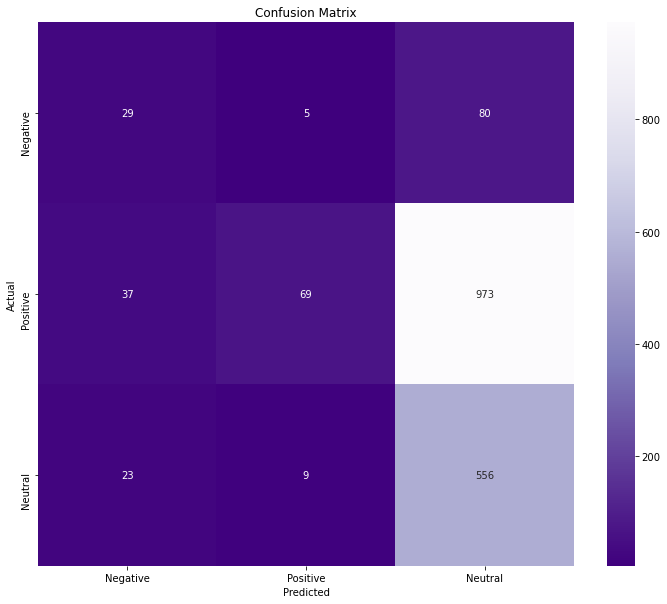

In [132]:
# Define the labels
labels = ['Negative','Positive', 'Neutral']

# Plotting a confusion matrix
mgnb_cm = confusion_matrix(y_test, y_pred_mgnb)
plt.figure(figsize=(12,10)) 
sns.heatmap(mgnb_cm, annot=True, cmap='Purples_r', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


For the vanilla model, a Multinomial Naive Bayes (MNB) classifier is fitted. MNB is a simple and effective probabilistic model that assumes that the features are conditionally independent given the class label.

This makes it well suited for text classification tasks as it can easily handle a large number of features (words) with limited training data, and can perform well even in high-dimensional feature spaces.

From the classification report, the model is a multi-class classifier with three classes: Negative, Neutral, and Positive. The precision, recall, and F1-score for each class are shown, indicating how well the model performed in identifying instances of that class.

The model has an overall **accuracy** of 0.37, indicating that it correctly classified **37%** of the samples in the test dataset.

### 6.3 Decision Tree Model

In [53]:
# Instantiating the Decision Tree Classifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(dense_X_train, y_train_Smote)

DecisionTreeClassifier()

In [54]:
# Making predictions of the test data 
y_pred_dt = dt_classifier.predict(dense_X_test)
target_names = ['Negative', 'Neutral', 'Positive']
print(classification_report(y_test, y_pred_dt, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.13      0.25      0.17       114
     Neutral       0.71      0.61      0.66      1079
    Positive       0.45      0.50      0.47       588

    accuracy                           0.55      1781
   macro avg       0.43      0.45      0.44      1781
weighted avg       0.59      0.55      0.57      1781



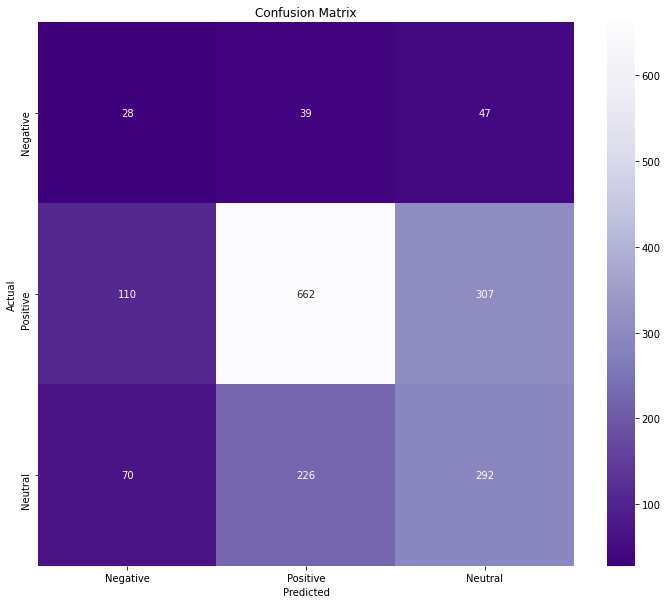

In [134]:
# Define the labels
labels = ['Negative','Positive', 'Neutral']

# Plotting a confusion matrix
mgnb_cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(12,10)) 
sns.heatmap(mgnb_cm, annot=True, cmap='Purples_r', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


The model has an overall accuracy of 0.55, indicating that it correctly classified 55% of the samples in the test dataset.

### 6.4 Support Vector Machine

In [59]:
# Training a SVM Classifier

svm_classifier = SVC(class_weight='balanced', kernel='rbf')
svm_classifier.fit(dense_X_train, y_train_Smote)


SVC(class_weight='balanced')

In [60]:
# Making predictions of the test data 
y_pred_svm = svm_classifier.predict(dense_X_test)
target_names = ['Negative', 'Neutral', 'Positive']
print(classification_report(y_test, y_pred_svm, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.39      0.38      0.38       114
     Neutral       0.75      0.66      0.70      1079
    Positive       0.51      0.64      0.57       588

    accuracy                           0.63      1781
   macro avg       0.55      0.56      0.55      1781
weighted avg       0.65      0.63      0.64      1781



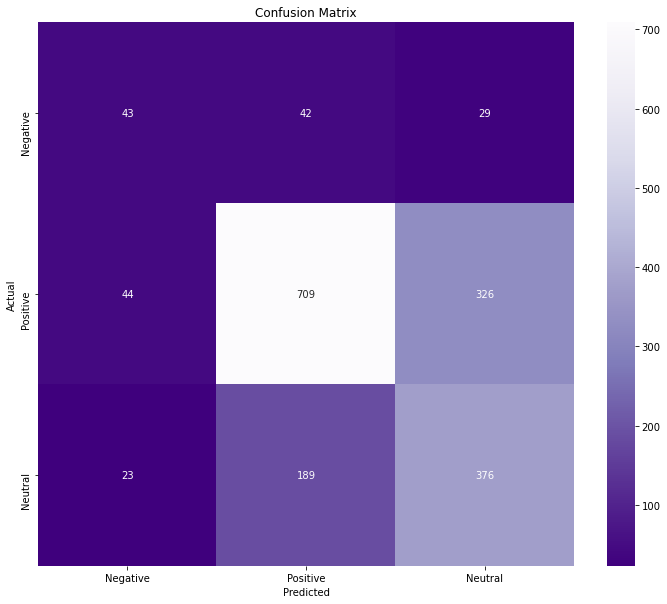

In [135]:
# Define the labels
labels = ['Negative','Positive', 'Neutral']

# Plotting a confusion matrix
mgnb_cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(12,10)) 
sns.heatmap(mgnb_cm, annot=True, cmap='Purples_r', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


The model has an overall accuracy of 0.63, indicating that it correctly classified 63% of the samples in the test dataset.

In [63]:
# Tuning the SVM model
svm_tuned = SVC(C=1000, gamma=0.01, kernel='rbf')
svm_tuned.fit(dense_X_train, y_train_Smote)
y_pred_SVMtuned = svm_tuned.predict(dense_X_test) 
target_names = ['Negative', 'Neutral', 'Positive']
print(classification_report(y_test, y_pred_SVMtuned, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.52      0.12      0.20       114
     Neutral       0.64      0.94      0.76      1079
    Positive       0.69      0.22      0.33       588

    accuracy                           0.65      1781
   macro avg       0.62      0.43      0.43      1781
weighted avg       0.65      0.65      0.58      1781



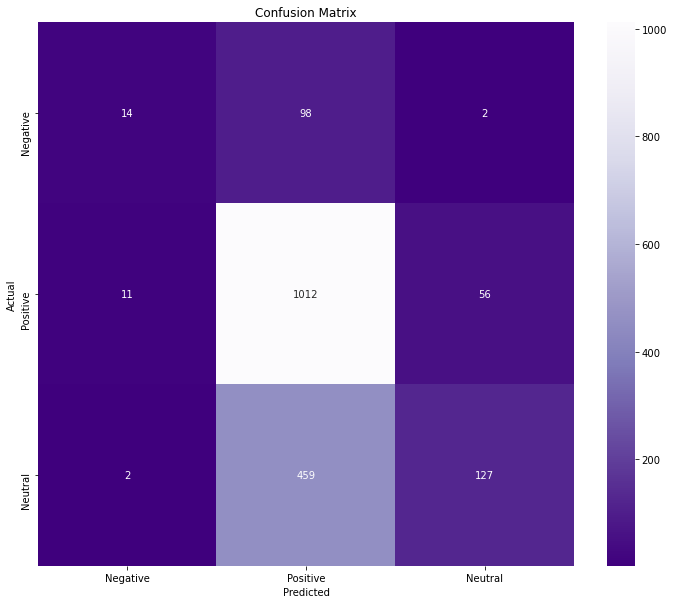

In [136]:
# Define the labels
labels = ['Negative','Positive', 'Neutral']

# Plotting a confusion matrix
mgnb_cm = confusion_matrix(y_test, y_pred_SVMtuned)
plt.figure(figsize=(12,10)) 
sns.heatmap(mgnb_cm, annot=True, cmap='Purples_r', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Despite tuning the model, the scores remained the same.

### 6.5 Random Forest Classifier

In [66]:
# Create random forest classifier with balanced class weights
rf_classifier = RandomForestClassifier(class_weight='balanced')

# Train the model on the training data
rf_classifier.fit(dense_X_train, y_train_Smote)

# Predict on the test data
y_pred_rf = rf_classifier.predict(dense_X_test)
target_names = ['Negative', 'Neutral', 'Positive']
print(classification_report(y_test, y_pred_rf, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.45      0.21      0.29       114
     Neutral       0.70      0.78      0.74      1079
    Positive       0.54      0.48      0.51       588

    accuracy                           0.65      1781
   macro avg       0.56      0.49      0.51      1781
weighted avg       0.63      0.65      0.63      1781



The model has an overall accuracy of 0.65, indicating that it correctly classified 65% of the samples in the test dataset.

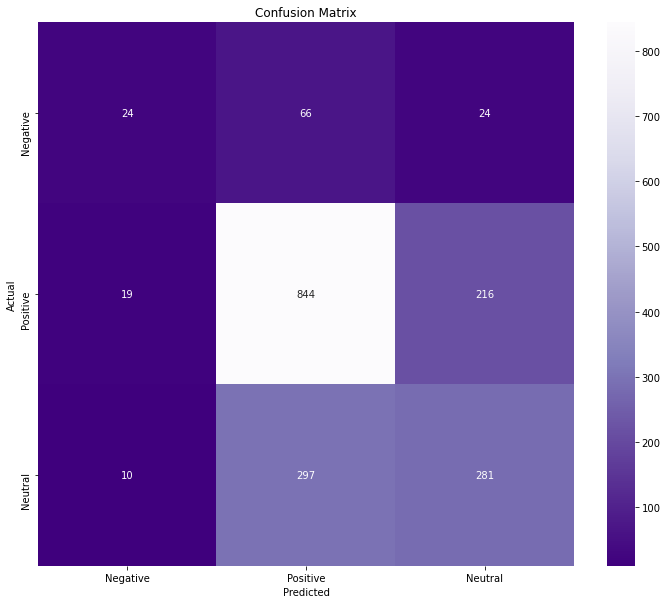

In [137]:
# Define the labels
labels = ['Negative','Positive', 'Neutral']

# Plotting a confusion matrix
mgnb_cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(12,10)) 
sns.heatmap(mgnb_cm, annot=True, cmap='Purples_r', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## 7. Conclusions

1. Neutral emotions had the highest frequency at 5,500 words, positive at 2,900 and negative at 600 words.


2. Apple products had the highest mention followed by google. The least mentions were from the Android app.


3. The best performing model in this analysis was the Support Vector Machine and was tuned with  C=1000, gamma=0.01 and kernel='rbf'. The SVM model had a recall and an accuracy score of 65% which is a balanced score compared to the other models. The recall score is important as it ensures that the model correctly identifies the true positives. This model ensures that the 65% of negative scores are placed in their right class as the magnitude of classifying a negative as any other emotion is much greater than any other misclassification.


Even though it may not have the highest level of accuracy, implementing automated Twitter sentiment analysis would represent a positive move towards effectively keeping track of Twitter users' attitudes towards Company Goku's latest mobile phone.

## 8. Recommendations

1. Company Goku should utilize the model to keep track of the general sentiment towards the mobile phone industry and also to observe the attitudes of people towards competing products.


2. Company Goku  to utilize Twitter's API to screen and select tweets containing relevant hashtags and text related to their mobile phone. These chosen tweets can then be evaluated by the model to determine their sentiment, providing a means to monitor and keep up-to-date with the current attitudes of Twitter users towards their product.


3. The model would be useful to the company as they can use it to identify users sentiments about thier products and act upon this. They could use the positive tweets to build on their strengths and use the negative ones to identify potential growth areas.


4. The company can consider building and incorporating features similar to Apple phones as they have the most positive sentiments among all brands and products.


5. Establish a notification system that can keep a check on any alterations in sentiment, allowing for swift action to be taken.


6. The company should continuously update and improve the model as new data becomes available to ensure the most accurate and effective analysis possible. This could lead to an improvement of the model in the long run.

## 9. Challenging the solution

We were able to get an accuracy of 65%, but can we do better and how? This question brings us to future improvement ideas. 

## 10. Future Improvement Ideas

1. Improve the granularity of emotional analysis by incorporating a more detailed scale. Not all text data will express the same level of negativity or positivity. To address this, using a scale that ranges from very negative to somewhat negative, neutral, somewhat positive, and very positive, can help to identify the subtleties in the sentiment analysis. This approach can enable taking appropriate actions according to the severity of the situation.

2. Broaden the range of the sentiment analysis monitoring by including additional publicly accessible text data sources. There are several sources like public forums or other social media platforms, as well as product reviews, which can provide valuable insights into the overall sentiment towards a product. Though product reviews typically include a rating, the overall sentiment may not always be accurately represented by the rating. A new model is necessary to classify this type of data, as it has a different structure than tweets.

### 11. Deployment of the model

1. Setting up an ETL pipeline for retrieving data using the Tweepy API and preprocessing it for use by the model involves creating a series of processes that Extract, Transform and Load data from the Tweepy API. This can involve extracting tweets, transforming them into a suitable format for the machine learning model to use, and then loading the preprocessed data into the machine learning model. The ETL pipeline will include error handling and data validation to ensure that the data used by the machine learning model is accurate and consistent.


2. A web application will be set up using Flask using the Flask web framework to create a web application that can be used to interact with the machine learning model. Flask allows developers to create web applications quickly and easily, and can be used to handle requests and responses from users. The web application will be designed to display the results of the machine learning model and to allow users to interact with the model directly.


3. A machine learning pipeline will be created and integrated into the web app to preprocess input data and make predictions. This pipeline will then be integrated into the web application so that users can interact with the model through the application. The pipeline will be designed to handle input data of different types and to return results in a clear and easy-to-understand format.


4. While deploying an Amazon Web Services account will be set up and used to host the application. 
